In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler as SS
from sklearn.pipeline import Pipeline

mpl.rcParams['figure.dpi'] = 350
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data = load_boston()
Xdf = pd.DataFrame(data=data.data, columns = data.feature_names)
y = data.target

ss = SS()
X_scaled = ss.fit_transform(Xdf) # Z-scores
x = (Xdf - np.mean(Xdf)) / (np.std(Xdf)) # Double check z-scores by doing it by hand

Xdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [62]:
# Question 6
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model = model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE for linear regression with all features: ", rmse)

RMSE for linear regression with all features:  4.679191295697281


In [63]:
# Question 7
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE

n_folds = 10
kf = KFold(n_splits=n_folds, random_state=1234,shuffle=True)

PE = []
model = Lasso(alpha=0.03)

for train_index, test_index in kf.split(X_scaled):
    X_train = X_scaled[train_index]
    y_train = y[train_index]
    X_test = X_scaled[test_index]
    y_test = y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    PE.append(np.sqrt(MSE(y_test, y_pred)))
    print('Score:', np.sqrt(MSE(y_test, y_pred)))
    
print("\n10-fold cross-validation Lasso prediction error: ", np.mean(PE))

Score: 4.000297836671668
Score: 5.330620115760669
Score: 4.769783941852378
Score: 3.9324767445250863
Score: 4.124363596219288
Score: 4.66374168811919
Score: 4.016645968629126
Score: 4.543604036089954
Score: 4.443272551481423
Score: 8.043098086726449

10-fold cross-validation Lasso prediction error:  4.786790456607522


In [64]:
# Question 8

n_folds = 10
kf = KFold(n_splits=n_folds, random_state=1234,shuffle=True)

PE = []
model = ElasticNet(alpha=0.05, l1_ratio=0.9)

for train_index, test_index in kf.split(X_scaled):
    X_train = X_scaled[train_index]
    y_train = y[train_index]
    X_test = X_scaled[test_index]
    y_test = y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    PE.append(np.sqrt(MSE(y_test, y_pred)))
    print('Score:',np.sqrt(MSE(y_test, y_pred)))
    
print("\n10-fold cross-validation Elastic Net prediction error: ", np.mean(PE))

Score: 3.9213034751140237
Score: 5.361172189963516
Score: 4.739447031679478
Score: 3.896532511380638
Score: 4.156084980170969
Score: 4.617460379751111
Score: 4.044240836477825
Score: 4.548352953129297
Score: 4.455783627245831
Score: 8.11442398730715

10-fold cross-validation Elastic Net prediction error:  4.785480197221984


In [76]:
# Question 9
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

polynomial_features = PolynomialFeatures(degree=2)
X_scaled_poly = polynomial_features.fit_transform(X_scaled)

model = LinearRegression()
model.fit(X_scaled_poly, y)
y_pred_poly = model.predict(X_scaled_poly)

rmse = np.sqrt(mean_squared_error(y, y_pred_poly))
print("RMSE for polynomial regression with all features: ", rmse)

RMSE for polynomial regression with all features:  2.449087064744557


In [66]:
# Question 10
polynomial_features = PolynomialFeatures(degree=2)
X_scaled_poly = polynomial_features.fit_transform(X_scaled)

model = Ridge(alpha=0.1)
model.fit(X_scaled_poly, y)

residuals = (y - model.predict(X_scaled_poly))

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.9470365643501282, pvalue=1.788881542896803e-12)


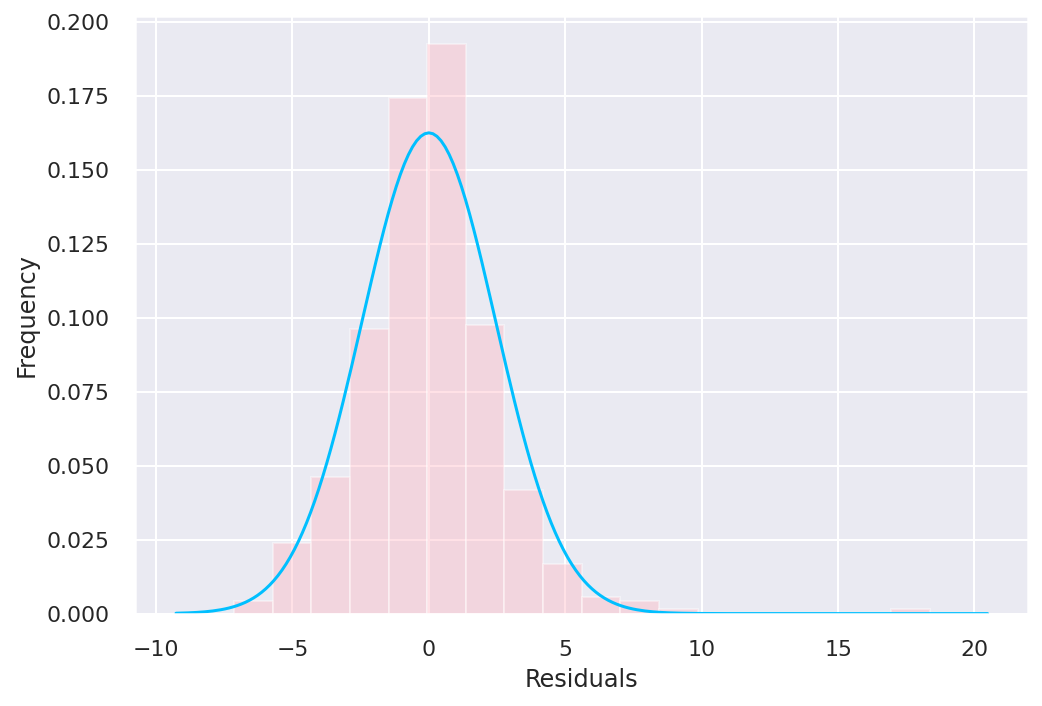

In [67]:
import seaborn as sns
sns.set(color_codes=True)
 
# import uniform distribution
from scipy import stats
from scipy.stats import norm

ax1 = sns.distplot(residuals,
                                        
                  bins=18,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue'})
ax1.set(xlabel='Residuals', ylabel='Frequency')

print(stats.shapiro(residuals))

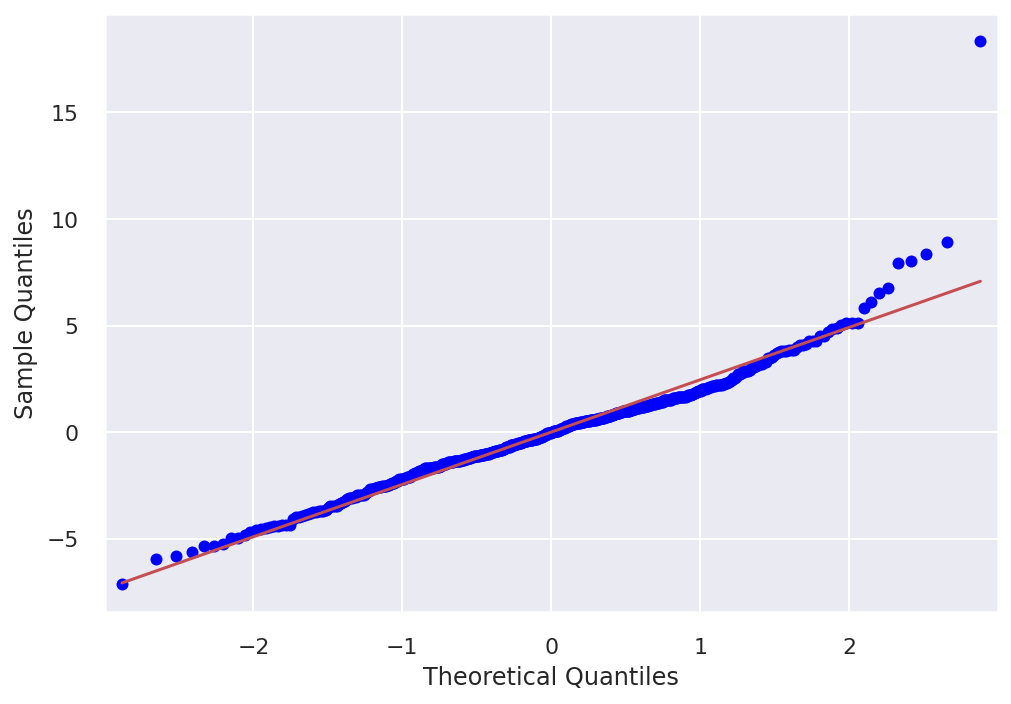

In [68]:
# Residuals
import pylab
import statsmodels.api as sm
sm.qqplot(residuals, loc = 0, scale = 1, line='s')
pylab.show()

In [69]:
#!pip install yellowbrick

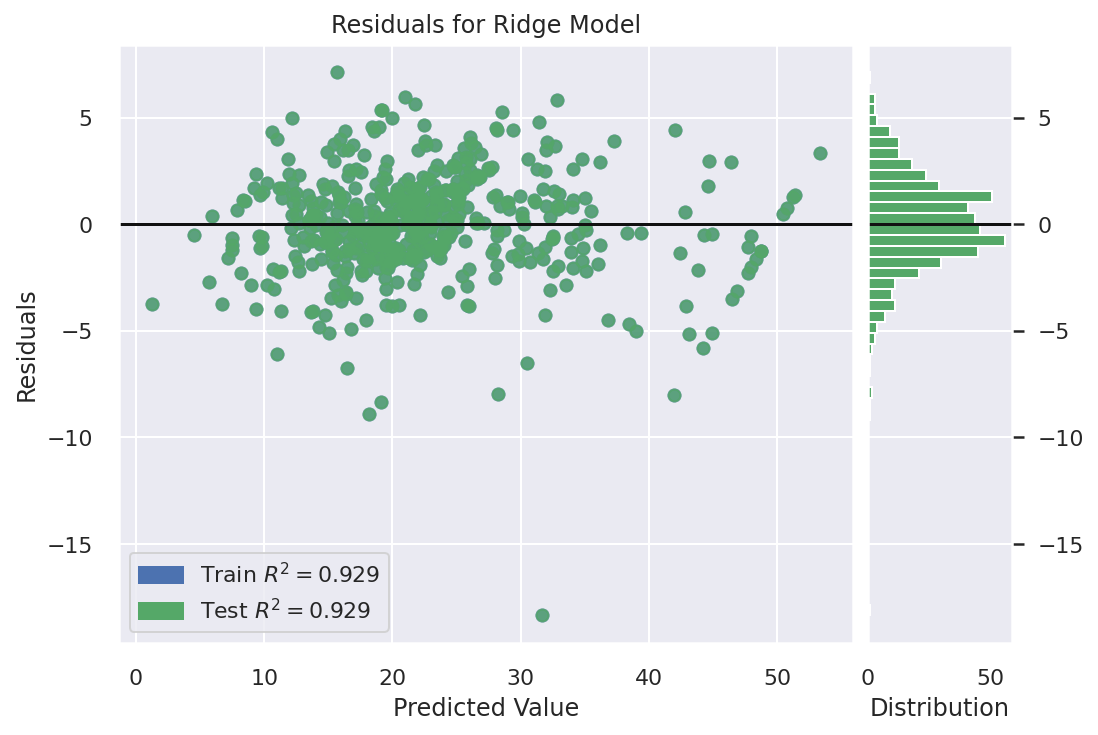

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [70]:
from yellowbrick.regressor import ResidualsPlot


visualizer = ResidualsPlot(model)

visualizer.fit(X_scaled_poly, y)  # Fit the training data to the visualizer
visualizer.score(X_scaled_poly, y)  # Evaluate the model on the test data
visualizer.poof()